In [1]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor

In [2]:
#load datasets

#Taken from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
df = pd.read_csv("datasets/Life_EXpectancy_Data.csv")

#Changes
df.Status = (df.Status == "Developed").astype(int)

for i in range(len(df.Country.unique())):
    df.replace(df.Country.unique()[i],i, inplace=True)

for i in df.columns:
    if True in df[i].isnull().unique():
        df[i].fillna(0, inplace=True)   #ASSUMPTION!!!!
#df["Hepatitis B"].isnull().value_counts()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


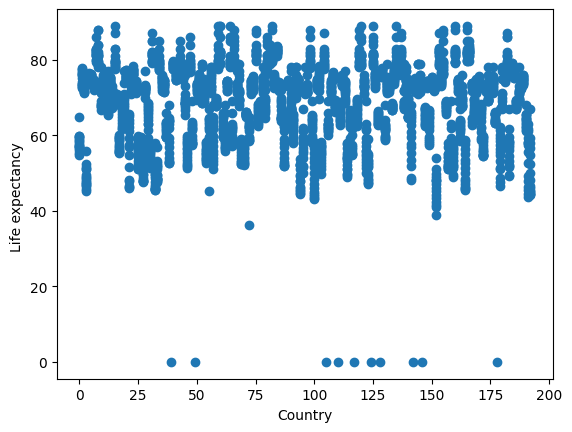

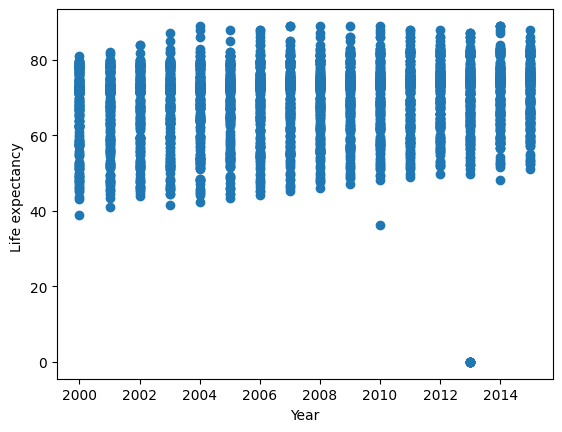

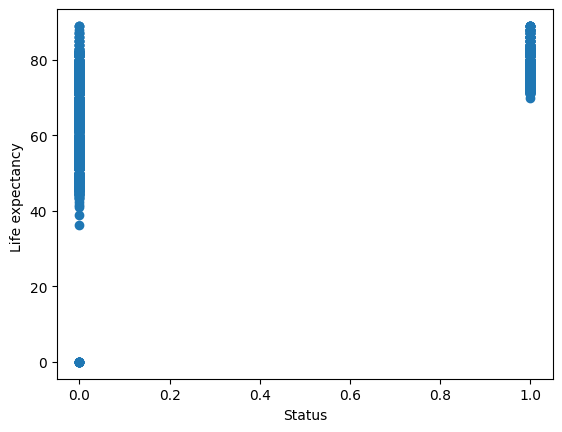

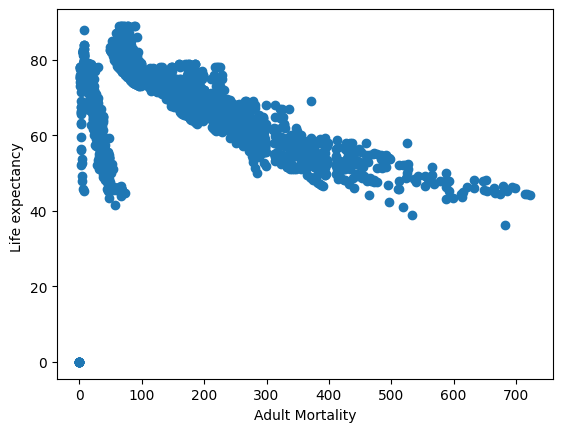

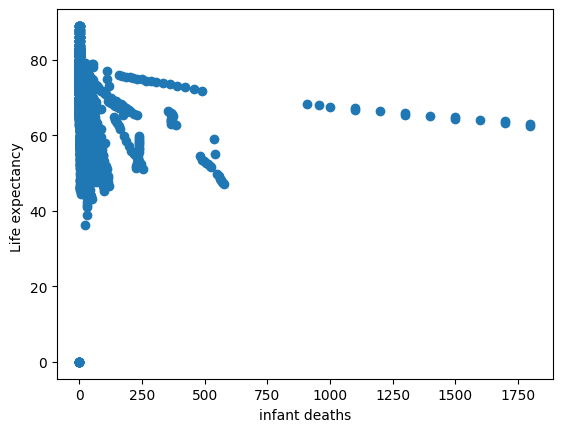

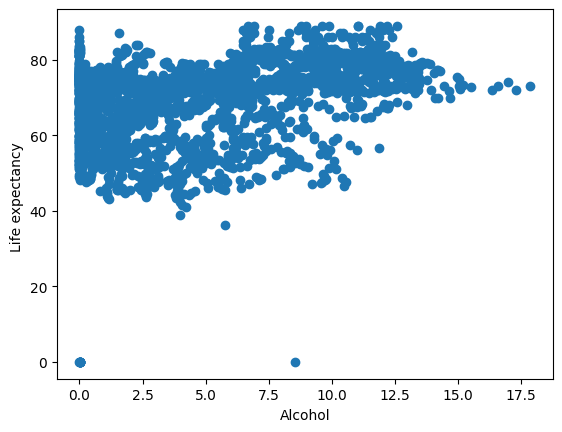

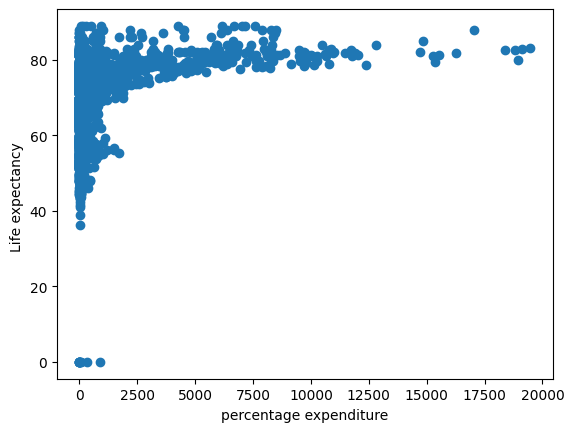

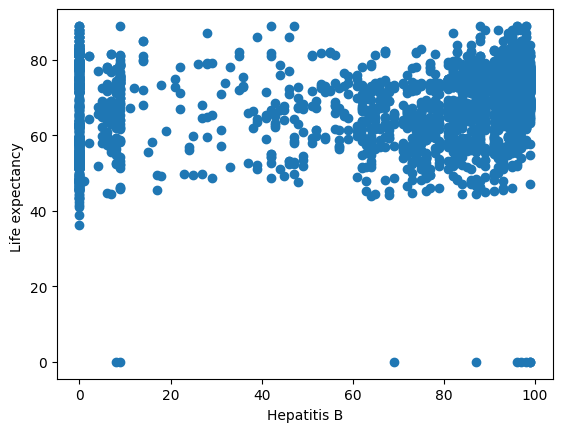

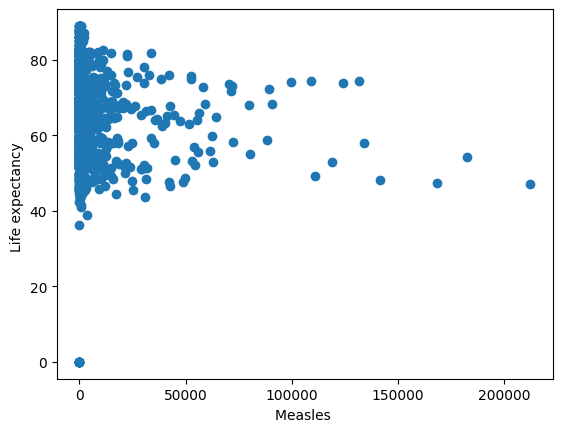

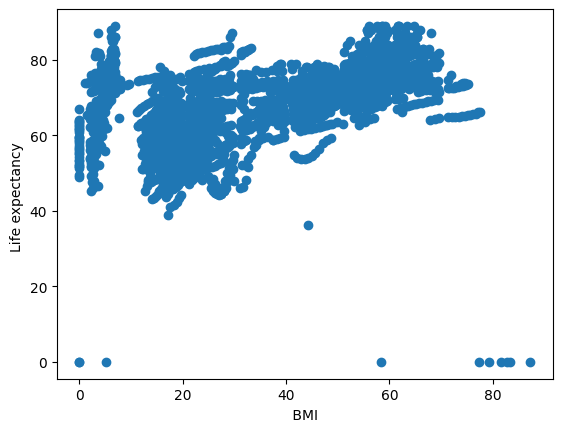

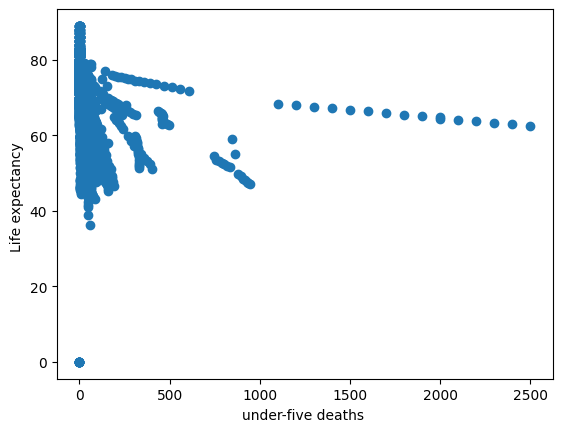

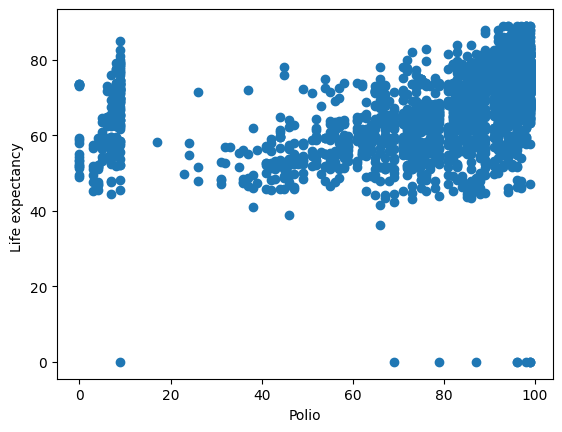

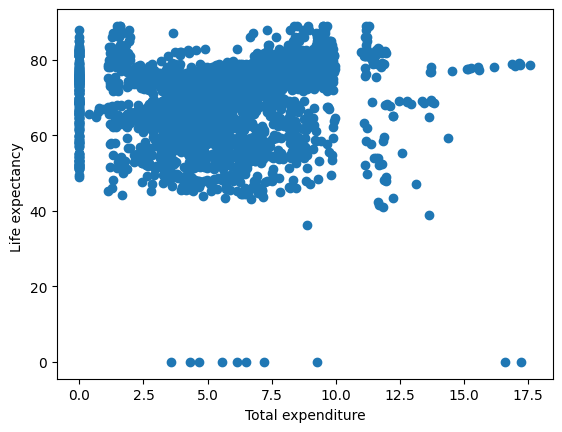

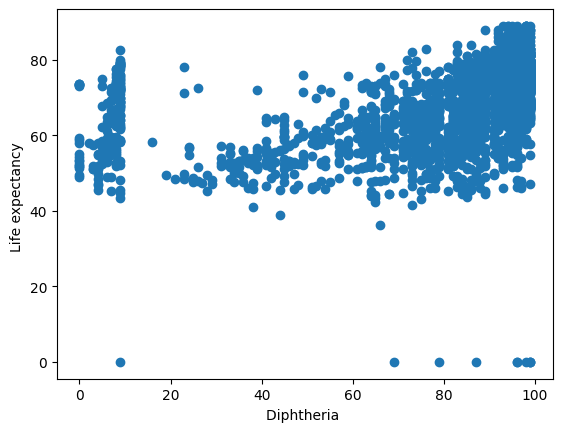

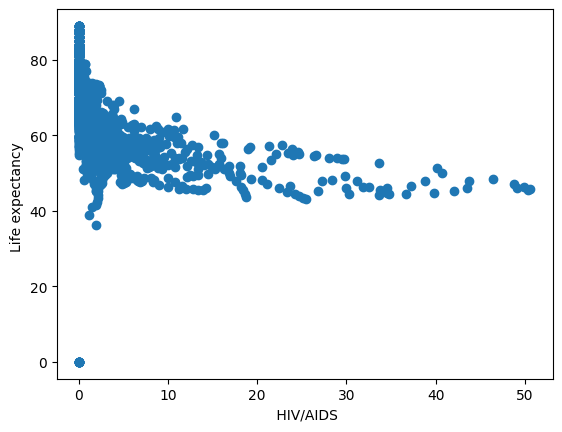

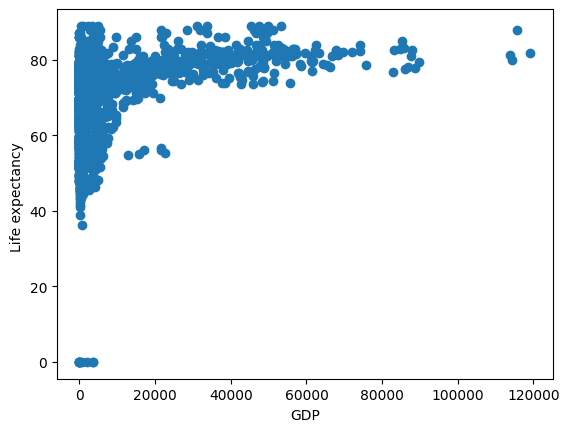

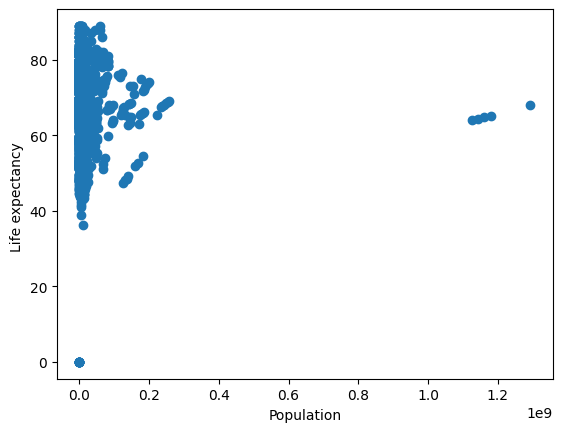

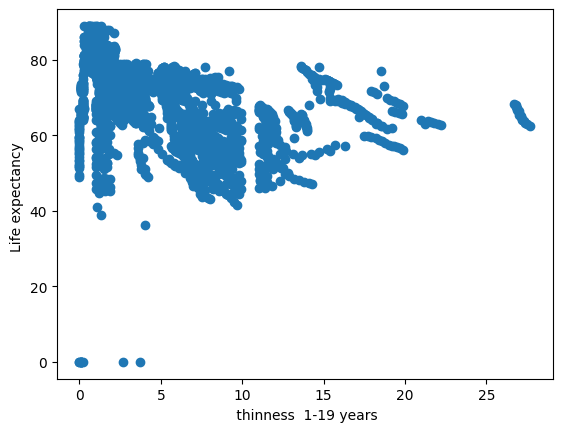

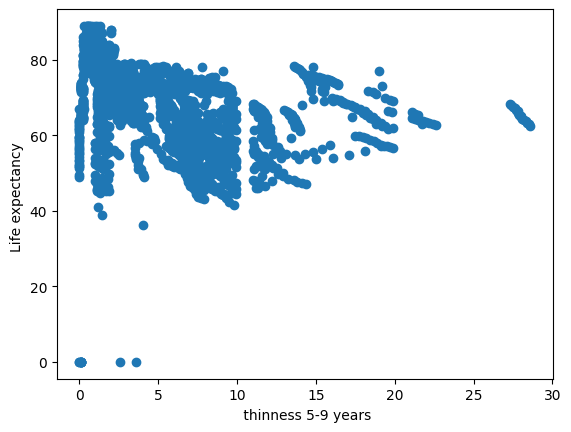

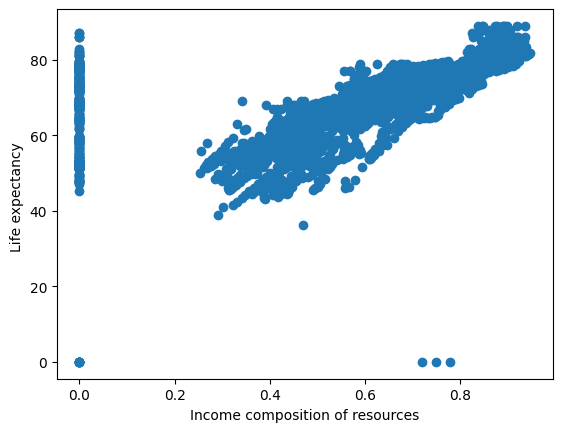

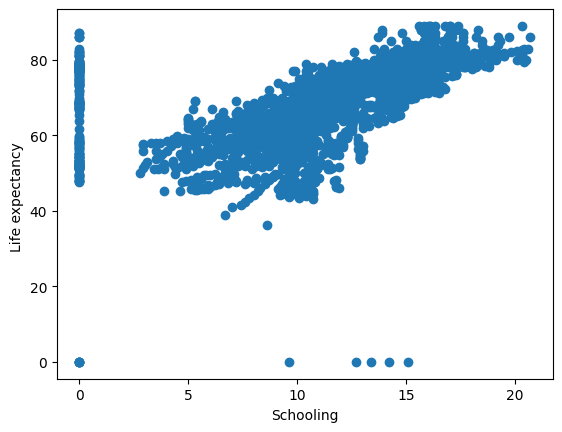

In [3]:
#Graphs for checking linearity
for col in df.drop(columns=["Life expectancy "]).columns:
    plt.scatter(df[col], df["Life expectancy "])
    plt.xlabel(col)
    plt.ylabel("Life expectancy ")
    plt.show()

In [4]:
#Split
X = df.drop(columns=["Life expectancy "])
Y = df["Life expectancy "]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
Y_test

1303    75.0
292     68.3
494     51.5
2537    64.5
1012    61.9
        ... 
1773    51.2
549     79.1
2908    63.0
113     82.7
1028    86.0
Name: Life expectancy , Length: 882, dtype: float64

In [10]:
#Bring to similar scale
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [7]:
#Create model
reg_model = LinearRegression()
#Train
reg_model.fit(X_train, Y_train)

LinearRegression()

In [8]:
#get prediction
prediction = reg_model.predict(X_test)

In [11]:
#Evaluate
from sklearn.model_selection import cross_val_score
mae = cross_val_score(reg_model, X, Y, scoring='neg_mean_absolute_error', cv = 5)
#mae.mean()
print(reg_model.score(X_test, Y_test))
print(mae)

0.6370719830703708
[-3.52584575 -3.97918657 -3.59113128 -4.35852563 -3.49774778]


Coeff of determination is  -0.0031587491803404255
MAE is  [-7.72028047 -8.01427504 -8.32071035 -8.03366152 -8.54975648]


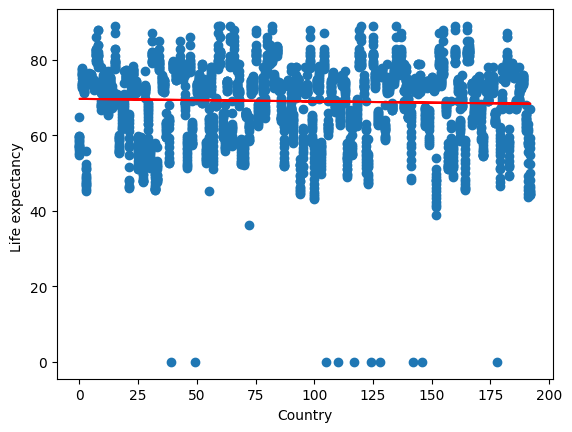

Coeff of determination is  0.01623034001923751
MAE is  [-8.51660218 -7.81819633 -8.17808155 -8.12107988 -7.96934866]


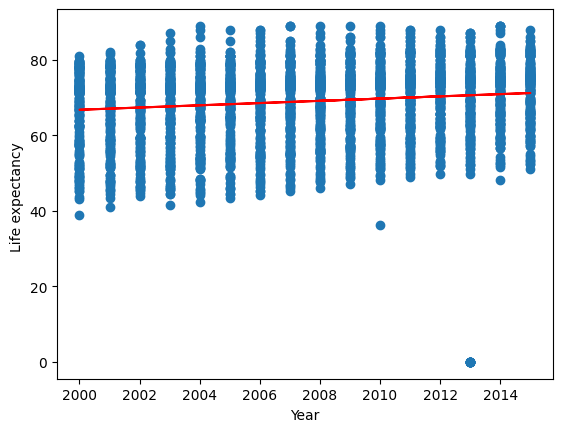

Coeff of determination is  0.17472697206702414
MAE is  [-6.49990801 -7.0633244  -7.08208745 -6.90331928 -6.80916557]


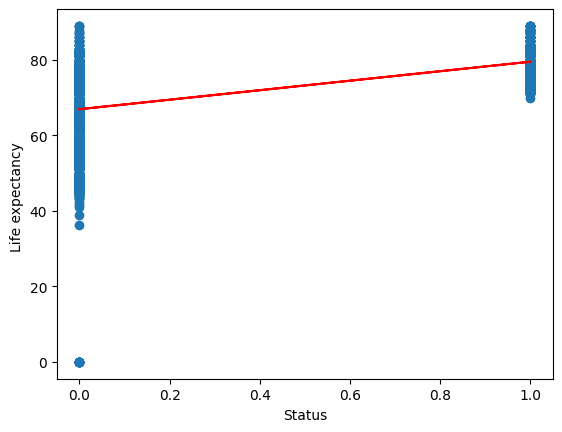

Coeff of determination is  0.37441693820344035
MAE is  [-4.95513825 -5.10246563 -4.9364266  -5.38380734 -5.69572173]


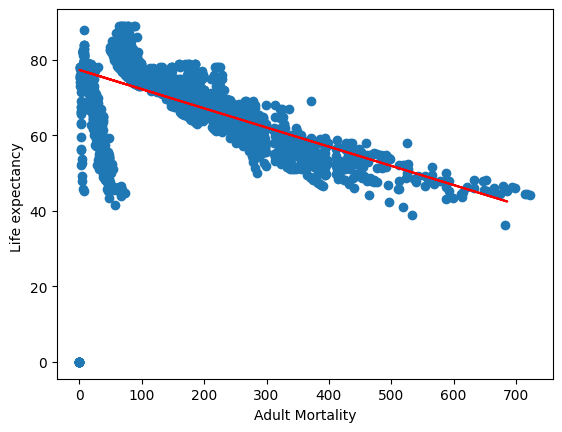

Coeff of determination is  0.031604191187636244
MAE is  [-7.46013016 -8.03688283 -7.85485663 -8.17050939 -8.2484949 ]


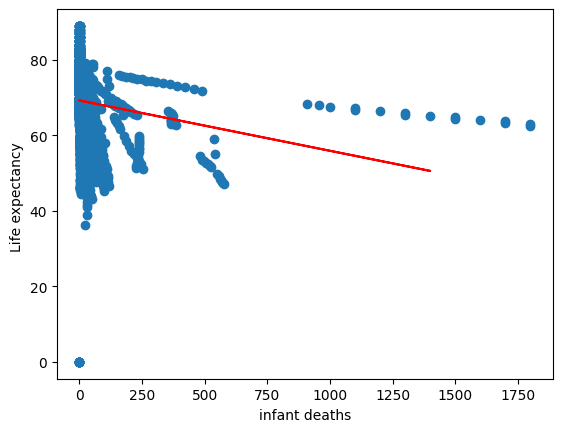

Coeff of determination is  0.12459388129520155
MAE is  [-6.98233826 -6.94858142 -7.59401026 -7.17126212 -7.20888478]


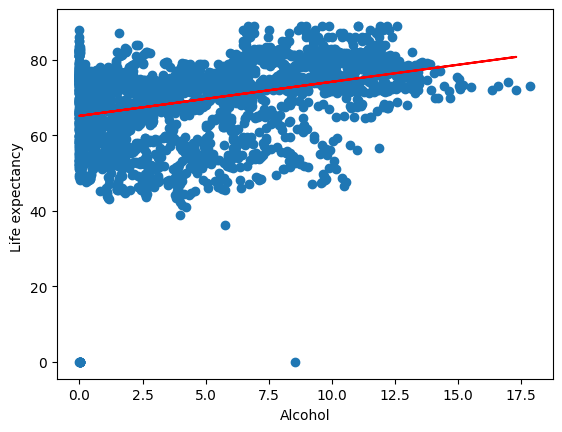

Coeff of determination is  0.1205892508242622
MAE is  [-7.24030811 -7.35276042 -7.38021194 -7.03196301 -7.74716779]


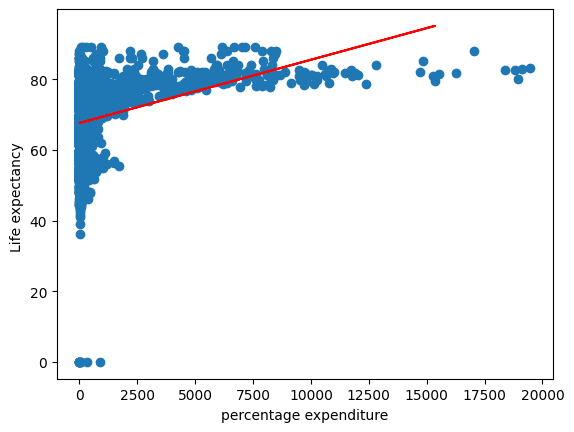

Coeff of determination is  0.04953705933685837
MAE is  [-7.89961069 -7.47669503 -7.97889766 -7.40064295 -7.77561196]


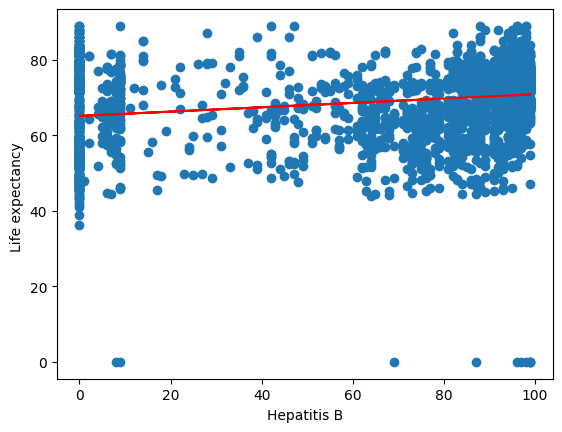

Coeff of determination is  0.018533647801502795
MAE is  [-7.74144199 -7.7251093  -7.67958716 -7.5251119  -8.33404265]


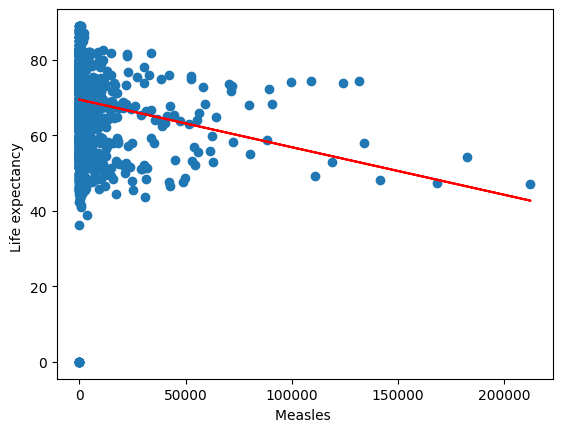

Coeff of determination is  0.29164182723236287
MAE is  [-6.09549177 -6.53604313 -5.73962316 -6.38285549 -6.21548364]


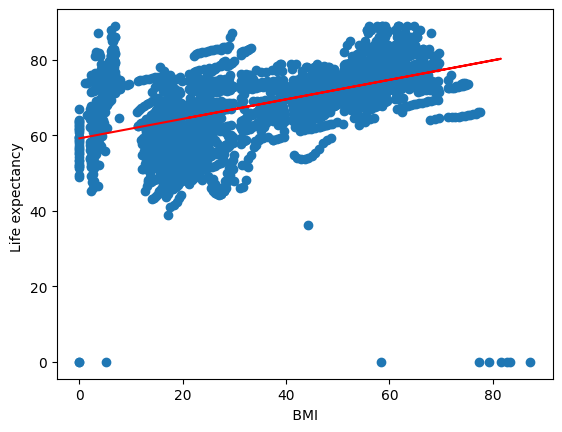

Coeff of determination is  0.036096721190434944
MAE is  [-7.24579474 -7.729296   -7.58457727 -7.56543138 -7.99427922]


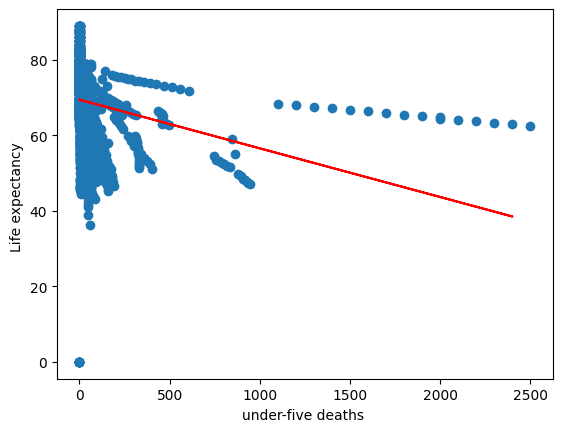

Coeff of determination is  0.16756499847706574
MAE is  [-6.97589829 -6.25987605 -6.77544998 -7.05480014 -6.74719325]


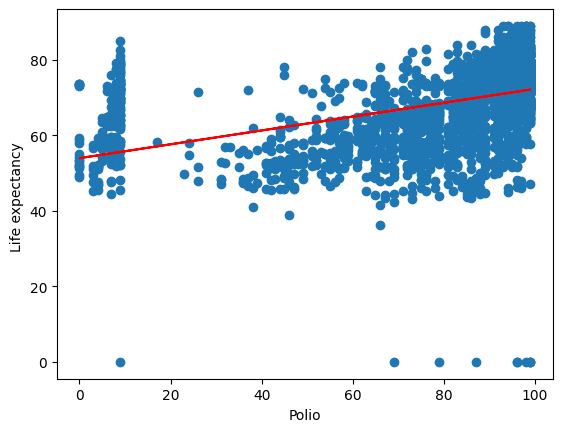

Coeff of determination is  0.010140859605925145
MAE is  [-8.01464952 -8.01079531 -7.62305929 -8.07887752 -7.35860652]


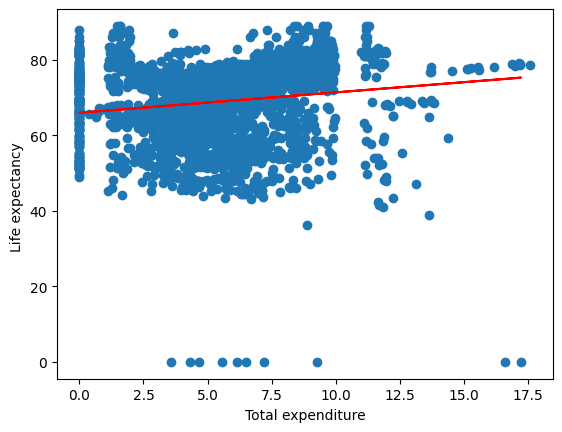

Coeff of determination is  0.209632297233736
MAE is  [-7.132631   -6.7266592  -6.35128794 -6.60291888 -6.85860975]


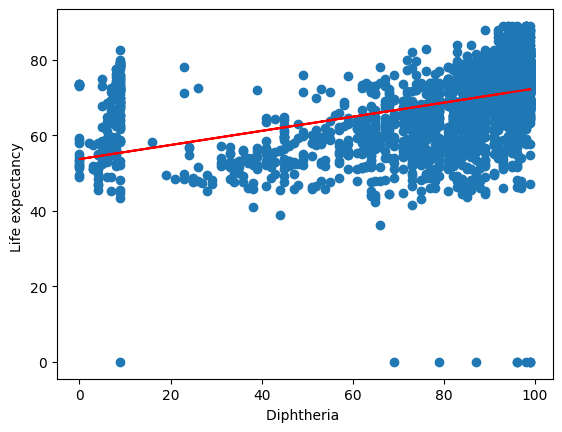

Coeff of determination is  0.253942366603101
MAE is  [-6.35784735 -7.39323138 -6.61455421 -6.46661143 -6.3528673 ]


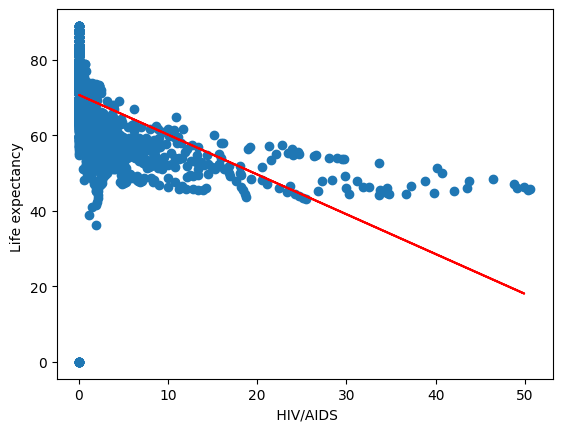

Coeff of determination is  0.16900388806507327
MAE is  [-6.89283024 -7.01649556 -6.73502649 -7.20967171 -7.39261931]


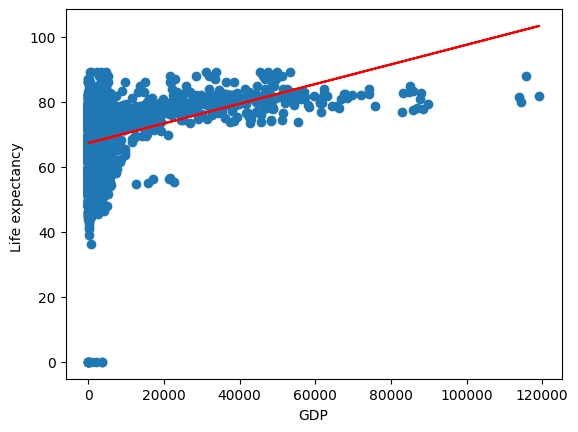

Coeff of determination is  -0.0012228787417660758
MAE is  [-7.75620368 -8.06194969 -8.31423677 -7.97204712 -7.8162973 ]


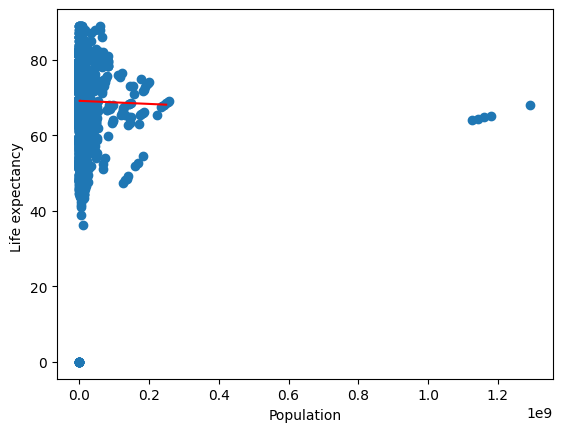

Coeff of determination is  0.20385971909543588
MAE is  [-7.38605203 -7.44763912 -6.87204276 -6.77497118 -7.51878798]


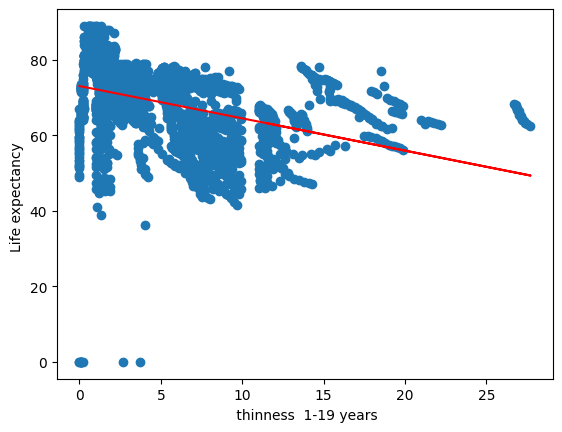

Coeff of determination is  0.1356145285514987
MAE is  [-7.41752494 -7.07991543 -6.75143331 -6.91025705 -6.78888972]


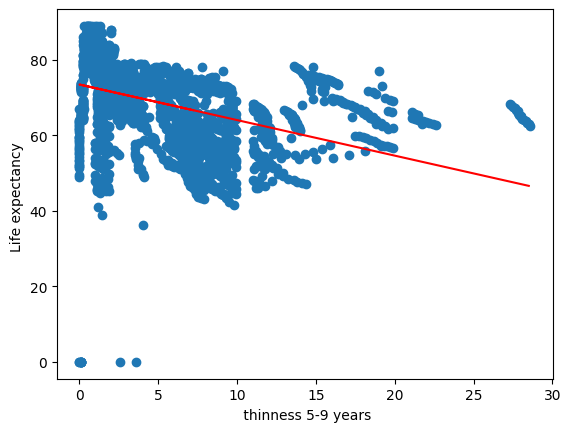

Coeff of determination is  0.3656433439244089
MAE is  [-5.78621703 -5.472301   -5.23655994 -6.34546328 -5.59284367]


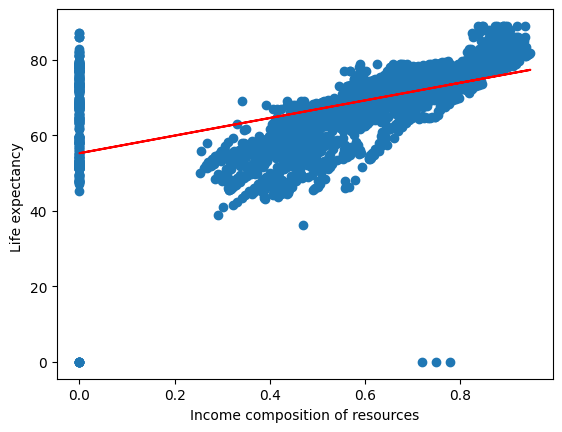

Coeff of determination is  0.3021851145602831
MAE is  [-4.78580016 -5.52652503 -6.0752876  -6.03664517 -5.82438745]


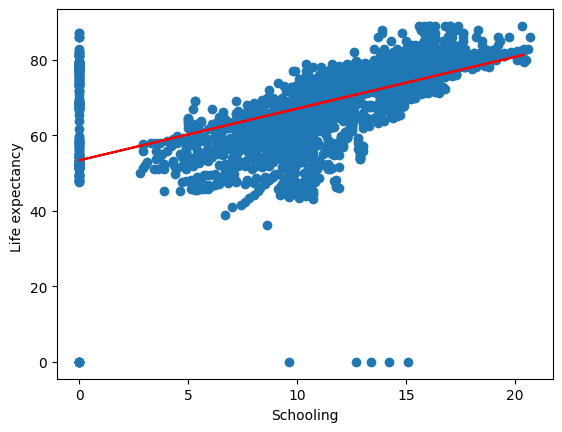

In [113]:
#Try more
for col in df.drop(columns=["Life expectancy "]).columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df[col].values.reshape(-1,1),df["Life expectancy "].values.reshape(-1,1), test_size=0.3)
    reg_model.fit(X_train, Y_train)
    print("Coeff of determination is ",reg_model.score(X_test, Y_test))
    print("MAE is ",cross_val_score(reg_model, X_train, Y_train, scoring='neg_mean_absolute_error', cv = 5))
    plt.scatter(df[col], df["Life expectancy "])
    plt.xlabel(col)
    plt.ylabel("Life expectancy ")
    plt.plot(X_test, reg_model.predict(X_test), color="red")
    plt.show()